In [1]:
library(rstan)

Loading required package: StanHeaders


rstan version 2.32.5 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)




In [2]:
## choose whatever is appropiate for your computing environment
## useful on laptop
cores <- parallel::detectCores()
## needed on cluster
#cores <- as.numeric(Sys.getenv("NSLOTS"))

In [3]:
options(mc.cores = cores)

In [4]:
expose_stan_functions('pkpd_mvn_approxb.stan')

In [5]:
valogit(50/100)

[1] 0

In [6]:
chains <- 4
iter <- 5000
warmup <- iter/2

___

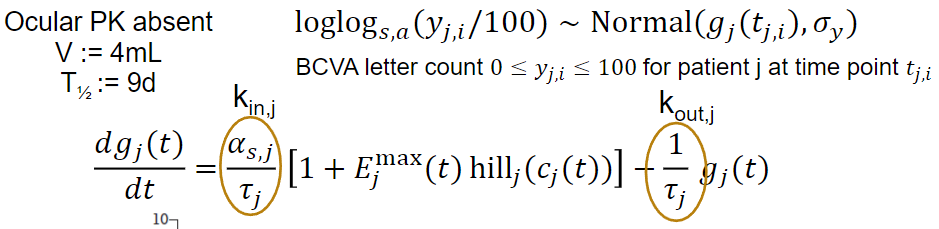

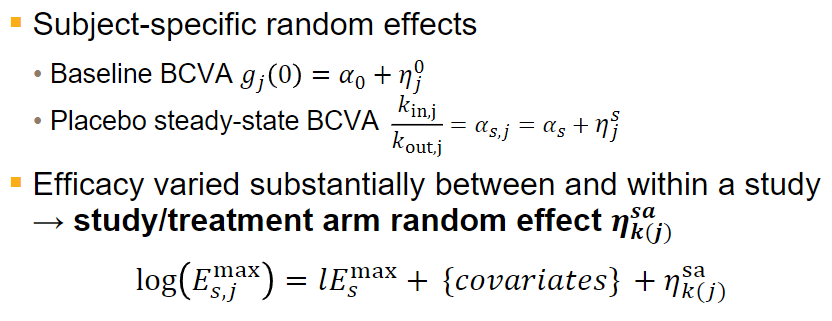

$\frac{dR_j(t)}{dt}=k^{in}_j-k^{out}_{j}[R_j(t)-E_{max_j}S_j(C_j(t))]$

$R^{SS}_j=(k^{in}_j/k^{out}_j)+E_{max_j}s_j$

Constant maximal drug effect means $S_j(t)=s_j=1$ for a patient in treatment group and o for placebo patients.
$R_j(t)=R^{ss}_j+(R_{0_j}-R^{ss}_jexp(-k^{out}_jt))$

$R_{0_j}\sim N(L\alpha_0, \sigma^2_{L\alpha_0})$
$L\alpha_0\sim N(0,2^2), \sigma_{L\alpha_0}\sim N^+(0,1^2)$

In [10]:
Lalpha_0 <- valogit(50/100)
sigma_Lalpha_0 <- 0.2
Lalpha_0

[1] 0

$L\alpha_s=\frac{\kappa^{in}_{j}}{\kappa^{out}_{j}}$ is the placebo steady state, the asymptotic value patients reach if not on treatment.

$L\alpha_s=logit(35/100)$

$L\alpha_s\sim N(-1, 2^2)$

In [9]:
Lalpha_s <- valogit(35/100)
Lalpha_s

[1] -0.6190392

$log(1/k^{out}_{j}) \sim N(l_\kappa, \sigma^2_{l_\kappa})$ detemines the patient specific time scale of the exponential change. $\kappa^{out}_j$ is a rate of change
$l_\kappa=log(10/52)$ and $l_\kappa\sim N(log(1/4), log(2)^2)$

$\sigma_{l_\kappa}\sim N^+(0, 1^2)$

In [ ]:
lkappa <- log(10/52)
sigma_lkappa <- 0.5

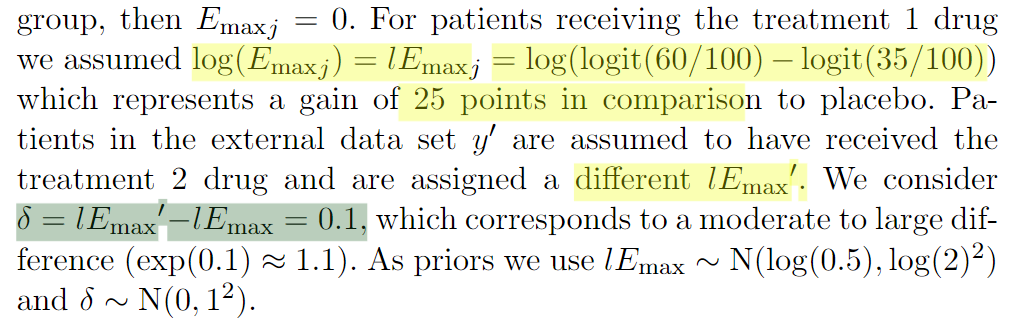

In [11]:
lEmax <- log(valogit(60/100)-Lalpha_s) # patients received treatment 1 with raw measurements data
lEmax

[1] 0.0242089

In [13]:
sigma_y <- 5/100 # measurement error

___

In [14]:
## from the first group the first half is placebo, the rest is on
## treatment 1
J <- 100

J_prime <- 100

In [15]:
## let's say we cover a year and measure monthly
x <- seq(0, 52, length=13) / 52
T <- 13

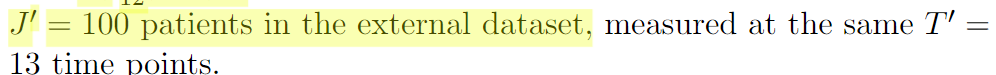

In [16]:
## for simplicity assume the prime data set is at the same time-points
x_prime <- seq(0, 52, length=13) / 52
T_prime <- 13

In [17]:
## number of simulations per draw of the posterior to get
## approximated log-lik weight
J_tilde <- 500

$\phi=\{\phi_1, \phi_2, \phi_3 \phi_4, \phi_5, \phi_6, \phi_7\} = \{L\alpha_0, L\alpha_s, l_\kappa, lEmax, log(\sigma_{L\alpha_0}), log(\sigma_{L\kappa}), log(\sigma_y) \}$

In [1]:
## define weakly-informative prior
## phi is ordered as:
##  phi[1] = Lalpha_0;
##  phi[2] = Lalpha_s;
##  phi[3] = lkappa;
##  phi[4] = lEmax;
##  phi[5] = log(sigma_Lalpha_0);
##  phi[6] = log(sigma_lkappa);
##  phi[7] = log(sigma_y);

$\mu_\phi$

In [2]:
mu_phi_p <- c(0, -1, log(1/4), log(0.5), 0, 0, 0)

In [3]:
K_phi <- length(mu_phi_p)

In [4]:
Sigma_phi_p <- diag(c(2, 2, log(2), log(2), 1, 1, 1)^2)

In [7]:
K <- 1
delta <- array(0.1, dim=1)
delta

[1] 0.1

In [8]:
mu_delta_p <- array(0, dim=1)
Sigma_delta_p <- matrix(1^2)

In [9]:
Sigma_delta_p

1


In [ ]:
# simulated asymptotic values for each group
inv_valogit(Lalpha_s) ## placebo t=inf
inv_valogit(Lalpha_s + exp(lEmax)) ## drug=1 t=inf
inv_valogit(Lalpha_s + exp(lEmax + delta)) ## drug=2 t=inf